# Introduction to Machine Learning with PyTorch

*by Jonathan Frawley*

<img style="text-align: center;" src="https://www.oreilly.com/library/view/deep-learning-for/9781788295628/assets/43dc9d10-cf03-456b-be23-ec2726f39463.png" width="200"/>

## Before we begin - Format for the course

* This course is due to run for 2 hours so do make sure you’re comfortable and have a drink with you.
* There will be a break from 10:40-10:50
* You can also contribute to the meeting using the chat panel.
* Please set your microphone to mute when you are not talking.
* Course link: <https://bit.ly/jf_ml_course>

# Who am I?
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Research Software Engineer in Advanced Research Computing
 - Part-time PhD in Computer Science in Deep Learning
 - Colleagues from ARC on hand to help

# Icebreaker 

 - Say briefly why you joined this course today in chat
 - If you have questions throughout the day, please put it into chat

# Basic information about today
 - Mixture of lectures and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <https://github.com/jonathanfrawley/machine_learning_course>

# Outline of Day
 1. Introduction to Machine Learning and PyTorch (lecture 10:00-10:30, exercises 10:30-10:40)
 2. Break (10:40-10:50)
 3. Real-world PyTorch (lecture 10:50-11:40, exercises 11:40-11:55)
 4. Wrap up (11:55-12:00)

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - We will use Google Colab for all exercises
 - Links and instructions are included on the main page
 - If you get the following: **Warning: This notebook was not authored by Google.**, click **Run anyway**
 - [Test](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/example/colab_test.ipynb)

# Slides are all runnable as Colab notebooks
[Example](https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/master/slides/slides_01.ipynb)

# Introduction to Machine Learning and PyTorch

## Traditional AI
 - Rules-based
 - Programmer writes rules to represent the world
 - Simulate how rules behave in different situations

### Unsupervised Machine Learning
 - Learn about dataset in an automated way
 - Clustering

### Supervised Machine Learning
 - Learn how to accomplish a task automatically from data
 - aka - deep learning


# Unsupervised Machine Learning

## Clustering

<img style="text-align: center;" src="https://www.guru99.com/images/1/030819_1030_Unsupervise3.png" alt="Clustering" width="800"/>

### K-Means Clustering
<img style="text-align: center;" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="K-Means Clustering" width="600"/>

# Supervised Machine Learning

# Deep Learning
<img style="text-align: center;" src="https://www.extremetech.com/wp-content/uploads/2015/09/sat-ai-head.jpg" alt="AI" width="300"/>

 - Programs learn solution based on data provided
 - More specifically, programs learn probability distribution of data provided
 - Fundamental ideas have been around for many decades, but in the last 10 years hardware has made it more feasible

<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png" alt="AI" width="800"/>


## Deep Learning Applications

## Medical Imaging

<img style="text-align: center;" src="https://miro.medium.com/max/1322/1*QbgD1Mkw6l0NRsGMi32yRA.png" alt="Self-driving car" width="800"/>


### Self-Driving Cars

<img style="text-align: center;" src="https://miro.medium.com/proxy/1*q1uVc-MU-tC-WwFp2yXJow.gif" alt="Self-driving car" width="800"/>


### Transformer (GPT-2) Example:
**Betsy was a pig who lived in Devon, she was taken care of by** a local hunter. His wife Sarah lived with her in the same house. When Betsy died, Sarah, her daughter Emily, and her son Paul were left to care for the farm and its pigs. They were all too well versed in the ways of caring for a farm. They taught us all how to care for pigs. Betsy's spirit is alive today in Betsy's Family, and Emily, Chris, and Paul call her Betsy. They frequently speak about Betsy, who they believe is still with them. Betsy passed away in December, 2011. However, Betsy is now with Jesus, and at his right hand. So we sing this song with that and with our thanksgiving of


# Dall-E (https://openai.com/blog/dall-e/)
<img style="text-align: center;" src="https://raw.githubusercontent.com/jonathanfrawley/machine_learning_course/main/data/dalle.png" alt="Dall-E" width="700"/>

## Other applications
 - Speech recognition
 - Text-to-speech
 - Customer support
 - Navigation
 - Search results
 - Product listings
 - DeepFakes
 - Face detection

## Deep Learning Challenges

 - Difficult to know how / why decision is arrived at
 - Generally require a large dataset to come to a good solution
 - Computationally expensive - though new hardware is helping
 - No consensus yet on universally good models for particular applications
 - Open datasets are rare, especially in medical imaging

# Introduction to PyTorch
*based on https://pytorch.org/tutorials/beginner/pytorch_with_examples.html*


# PyTorch: Custom nn Modules

In [14]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:

class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [16]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    y_pred = model(x)

    loss = criterion(y_pred, y)
    if t % 400 == 399:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

399 581.3184204101562
799 129.02755737304688
1199 34.4970703125
1599 14.40322494506836
1999 10.054778099060059


In [17]:
def show_result_module():
    x_data = np.linspace(-math.pi, math.pi, 2000)
    y_data = (model.a.item() + model.b.item()*x_data
        + model.c.item()*np.power(x_data,2)
        + model.d.item()*np.power(x_data,3))
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, label='prediction')
    ax.plot(x_data, np.sin(x_data), label='correct')
    ax.legend()
    plt.show()

Result: y = 0.0282797459512949 + 0.8344928026199341 x + -0.004878726787865162 x^2 + -0.09016579389572144 x^3


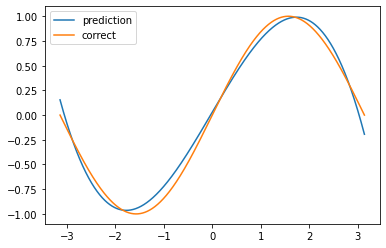

In [18]:
print(f'Result: {model.string()}')
show_result_module()

# References
 - NumPy and PyTorch examples are from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
 - Random forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
 - Underfitting and overfitting image (accessed on 2019-06-06): https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76

# Exercises
<https://colab.research.google.com/github/jonathanfrawley/machine_learning_course/blob/main/exercises/exercises_01.ipynb>